In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
import math

# Load the data
data = pd.read_csv('../../train_data_0.7.csv')

# Drop unnecessary columns
data_cleaned = data.drop(columns=['Eform', 'Eb'])
data_cleaned.rename(columns={'Unnamed: 0': 'Label'}, inplace=True)

# Extract features and target
X = data_cleaned.drop(columns=['Label', 'Ec']).values
y = data_cleaned['Ec'].values

# Normalize the features to [0, 1] range using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
X_scaled = scaler.fit_transform(X)

# Reshape features for 1D CNN
X_reshaped = X_scaled.reshape(X_scaled.shape[0], X_scaled.shape[1], 1)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y, test_size=0.2, random_state=42)

In [2]:
#set up CNN model
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from keras.utils import to_categorical

model = Sequential()
model.add(Conv1D(64, 3, input_shape=(X_train.shape[1], 1), activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.1))
model.add(Conv1D(128, 3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.1))
model.add(Conv1D(256, 3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.1))
model.add(Flatten())
model.add(Dense(256, activation='linear'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='linear'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 21, 64)            256       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 10, 64)           0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 10, 64)            0         
                                                                 
 conv1d_1 (Conv1D)           (None, 8, 128)            24704     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 4, 128)           0         
 1D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 4, 128)            0

In [ ]:
from keras.callbacks import EarlyStopping
#train model,epochs=40Iterate 40 times
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])

# Define early stop callback
early_stopping = EarlyStopping(monitor='val_mean_squared_error', patience=1000, restore_best_weights=True)

model.fit(X_train, y_train, epochs=10000, batch_size=8, validation_data=(X_test, y_test), callbacks=[early_stopping])

Epoch 1/10000
10/10 [==============================] - 2s 26ms/step - loss: 15.1311 - mean_squared_error: 15.1311 - val_loss: 8.3259 - val_mean_squared_error: 8.3259
Epoch 2/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.7482 - mean_squared_error: 7.7482 - val_loss: 6.5245 - val_mean_squared_error: 6.5245
Epoch 3/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.6643 - mean_squared_error: 4.6643 - val_loss: 4.2913 - val_mean_squared_error: 4.2913
Epoch 4/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.3248 - mean_squared_error: 4.3248 - val_loss: 3.7818 - val_mean_squared_error: 3.7818
Epoch 5/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.0545 - mean_squared_error: 4.0545 - val_loss: 3.8286 - val_mean_squared_error: 3.8286
Epoch 6/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.3552 - mean_squared_error: 3.3552 - val_loss: 3.5488 - val_mean_squared_error: 3.5488
Epoch 7/10000
10/10

In [4]:
# Predict and evaluate the model
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

1/1 [==============================] - 0s 37ms/step


In [5]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
rmse_tr=mean_squared_error(y_train,y_train_pred,squared=False)
rmse_te=mean_squared_error(y_test,y_test_pred,squared=False)
mae_tr = mean_absolute_error(y_train, y_train_pred)
mae_te = mean_absolute_error(y_test, y_test_pred)
r2_tr = r2_score(y_train, y_train_pred)
r2_te = r2_score(y_test, y_test_pred)

# Calculate Standard Error
train_se_rmse = rmse_tr / math.sqrt(len(y_train))
test_se_rmse = rmse_te / math.sqrt(len(y_test))
train_se_mae = mae_tr / math.sqrt(len(y_train))
test_se_mae = mae_te / math.sqrt(len(y_test))
train_se_r2 = r2_tr / math.sqrt(len(y_train))
test_se_r2 = r2_te / math.sqrt(len(y_test))

# Print results
print('RMSE (training) = %.3f' % rmse_tr)
print('RMSE (test) = %.3f' % rmse_te)
print('MAE (training) = %.3f' % mae_tr)
print('MAE (test) = %.3f' % mae_te)
print('R² (training) = %.3f' % r2_tr)
print('R² (test) = %.3f' % r2_te)

print(f'Training Standard Error_RMSE: {train_se_rmse}')
print(f'Test Standard Error_RMSE: {test_se_rmse}')
print(f'Training Standard Error_MAE: {train_se_mae}')
print(f'Test Standard Error_MAE: {test_se_mae}')
print(f'Training Standard Error_R²: {train_se_r2}')
print(f'Test Standard Error_R²: {test_se_r2}')

RMSE (training) = 0.113
RMSE (test) = 0.208
MAE (training) = 0.078
MAE (test) = 0.168
R² (training) = 0.997
R² (test) = 0.991
Training Standard Error_RMSE: 0.012613271902156725
Test Standard Error_RMSE: 0.04652600363464889
Training Standard Error_MAE: 0.008714664616336147
Test Standard Error_MAE: 0.03746838826519587
Training Standard Error_R²: 0.11147920706570395
Test Standard Error_R²: 0.2216151668323424


In [ ]:
import shap
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 12  # Set global font size to 12 (adjustable as needed)

# Define a wrapper function for the model to make it compatible with SHAP
def model_predict(X):
    # Reshape input to 3D for the CNN model
    X_reshaped = X.reshape((X.shape[0], X.shape[1], 1))
    return model.predict(X_reshaped).flatten()  # Flatten the predictions to 1D

# Reshape the data for SHAP to be 2D
X_train_reshaped = X_train.reshape(X_train.shape[0], -1)  # (samples, features)
X_test_reshaped = X_test.reshape(X_test.shape[0], -1)

# Initialize the SHAP KernelExplainer
explainer = shap.KernelExplainer(model_predict, X_train_reshaped)

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test_reshaped)

# Convert SHAP values to a DataFrame
shap_values_df = pd.DataFrame(shap_values, columns=data_cleaned.drop(columns=['Label', 'Ec']).columns)

# Calculate the mean absolute SHAP value for each feature
mean_shap_values = shap_values_df.abs().mean(axis=0)

# Save SHAP values and mean SHAP values to CSV
shap_values_df.to_csv('shap_values.csv', index=False)
mean_shap_values.to_frame(name='Mean SHAP Value').to_csv('mean_shap_values.csv')


3/3 [==============================] - 0s 2ms/step


  0%|          | 0/20 [00:00<?, ?it/s]

5235/5235 [==============================] - 7s 1ms/step


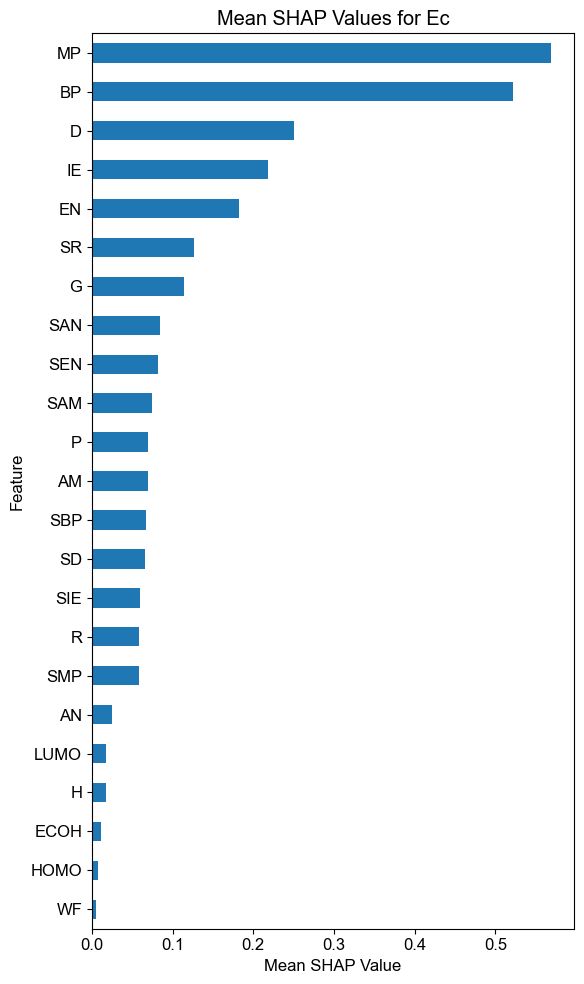

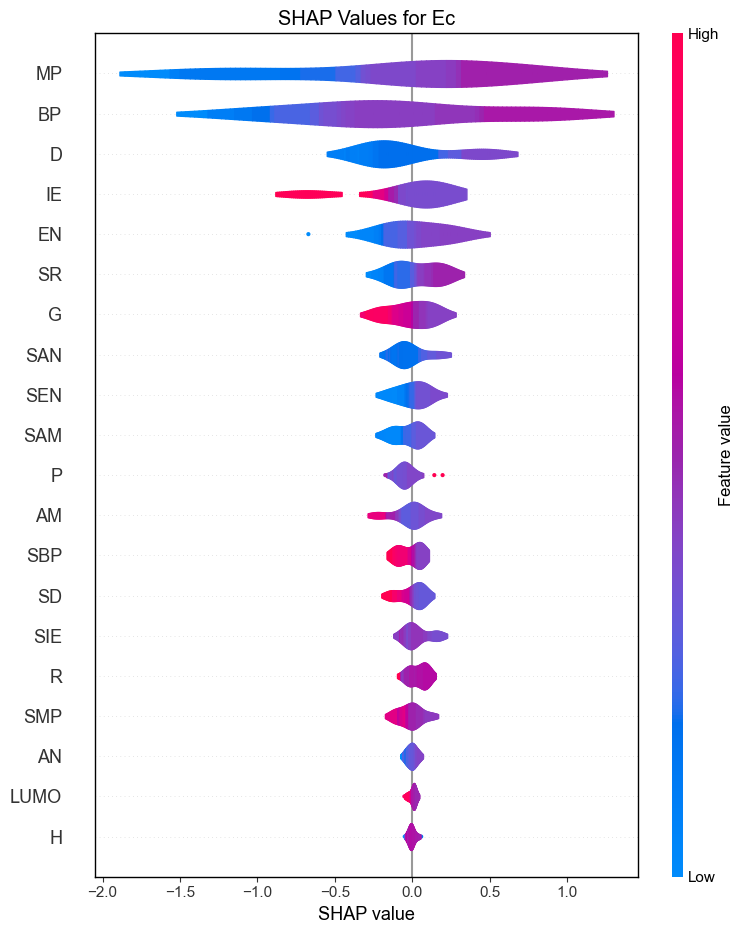

In [7]:
# Create a mean SHAP bar plot with feature names on the y-axis
plt.figure(figsize=(6, 10))
mean_shap_values.sort_values(ascending=True).plot(kind='barh')  # Use horizontal bar plot
plt.title('Mean SHAP Values for Ec')
plt.xlabel('Mean SHAP Value')  # Horizontal axis represents SHAP values
plt.ylabel('Feature')  # Vertical axis represents feature names
plt.tight_layout()


# Save the mean SHAP bar plot to a file
plt.savefig('./meanSHAP.jpg',dpi=500,bbox_inches='tight')
plt.show()
plt.close()  # Close the figure to free up memory

# Adjust SHAP summary plot size
plt.figure(figsize=(10, 6))  # Set the same size as the mean SHAP bar plot
shap.summary_plot(shap_values, X_test_reshaped, feature_names=data_cleaned.drop(columns=['Label', 'Ec']).columns, plot_type="violin", show=False)
# Customize the plot spines (borders)
ax = plt.gca()  # Get current axis
for spine in ax.spines.values():
    spine.set_visible(True)  # Make all spines visible
    spine.set_linewidth(1.0)  # Set the border line width

plt.xlabel("SHAP value")  # Replace the default x-axis label
plt.title('SHAP Values for Ec')
plt.tight_layout()


# Save the SHAP summary plot to a file
plt.savefig('./SHAP.jpg',dpi=500,bbox_inches='tight')
plt.show()
plt.close()  # Close the figure to free up memory



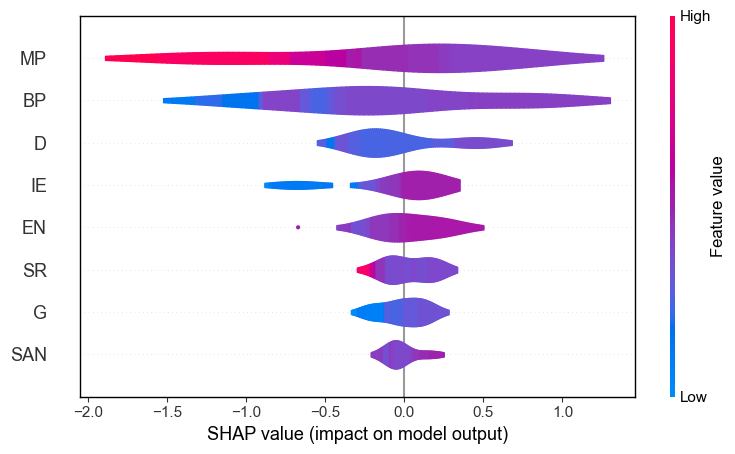

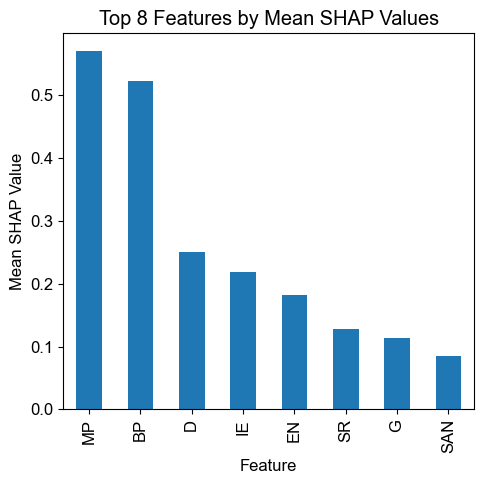

In [20]:
# Select the top 8 features based on mean SHAP values
top_features = mean_shap_values.sort_values(ascending=False).head(8).index

# Filter SHAP values and test data for these top features
top_shap_values = shap_values_df[top_features]
top_X_test = X_test_reshaped[:, mean_shap_values.index.isin(top_features)]


# Create a SHAP summary plot for top 8 features
plt.figure(figsize=(5, 5))  # Explicitly set figure size
shap.summary_plot(top_shap_values.values, top_X_test, feature_names=top_features, plot_type='violin', show=False)
# Customize the plot spines (borders)
ax = plt.gca()  # Get current axis
for spine in ax.spines.values():
    spine.set_visible(True)  # Make all spines visible
    spine.set_linewidth(1.0)  # Set the border line width

plt.tight_layout()
plt.savefig('./SHAP8top.jpg',dpi=500,bbox_inches='tight')
plt.show()

# Create a bar plot for the mean SHAP values of top 8 features
plt.figure(figsize=(5, 5))
mean_shap_values[top_features].sort_values(ascending=False).plot(kind='bar')
plt.title('Top 8 Features by Mean SHAP Values')
plt.ylabel('Mean SHAP Value')
plt.xlabel('Feature')
plt.savefig('./meanSHAP8top.jpg',dpi=500,bbox_inches='tight')
plt.tight_layout()
plt.show()
plt.close()  # Close the figure to free up memory

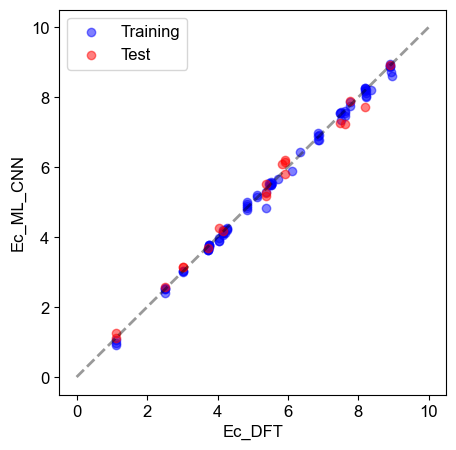

In [ ]:


model.save("./Ec.h5")

plt.figure(figsize=(5,5))
plt.scatter(y_train,y_train_pred,alpha=0.5,color='blue',label='Training')##alpha  transparency
plt.scatter(y_test,y_test_pred,alpha=0.5,color='r',label='Test',)
plt.plot([0,10],[0,10], color='k', linewidth=2,linestyle='--',alpha=0.4)
plt.legend()
plt.xlabel('Ec_DFT')
plt.ylabel('Ec_ML_CNN')
plt.savefig('./Ec.jpg',dpi=500,bbox_inches='tight')
plt.show()

In [18]:
# Save results to CSV for use in other software

d = {
    'y_train': y_train,
    'y_train_pred': y_train_pred.flatten(),
    'y_test': y_test,
    'y_test_pred': y_test_pred.flatten()
}
results_df = pd.DataFrame(pd.DataFrame.from_dict(d, orient='index').values.T, columns=list(d.keys()))

results_df.to_csv('./Ec_results.csv', index=False)

In [19]:
# Save X_train and X_test to CSV files
X_train_forsave= X_train.reshape(X_train.shape[0], -1)  # Flatten to 2D for saving
X_test_forsave = X_test.reshape(X_test.shape[0], -1)  # Flatten to 2D for saving

X_train_df = pd.DataFrame(X_train_forsave)
X_test_df = pd.DataFrame(X_test_forsave)

X_train_df.to_csv('X_train.csv', index=False)
X_test_df.to_csv('X_test.csv', index=False)

print("X_train and X_test have been saved to 'X_train.csv' and 'X_test.csv'")

X_train and X_test have been saved to 'X_train.csv' and 'X_test.csv'
